### Step 1: Importing libraries and data
In the first step, we shall move ahead with importing the relevant libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Data cleaning

Although our dataframe is extremely clean, we will try to refine the dataframe further more.

In the above datafram, the Id column is unnecessary and hence, we will drop it. More over, the word Iris has been repeated every time which provides no extra info. Hence, we will try to remove the iris word from the Species column.

In [3]:
df_iris.drop('Id',axis=1,inplace=True)


In [4]:
df_split=df_iris['Species'].str.rsplit('-',expand=True)
df_iris.drop('Species',axis=1,inplace=True)

In [5]:
df_iris['Species']=df_split.iloc[:,-1]
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 3: Data Visualisation

In this section, we are interested to check how the various sepal and petal widths and lengths vary for each species. 


### Sepal and Petal dimensions 

Let us first check how are the Sepal lengths and widths distributed

C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


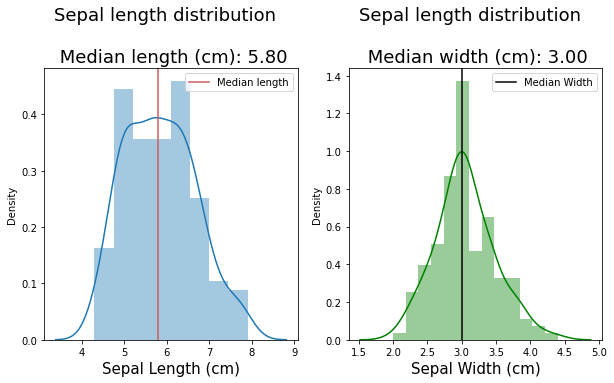

In [6]:
fig1=plt.figure(figsize=(10,5))
ax1=fig1.add_subplot(121)

g=sns.distplot(df_iris['SepalLengthCm'],ax=ax1)
ax1.set_xlabel('Sepal Length (cm)',size=15)
ax1.set_title('Sepal length distribution  \n \n Median length (cm): {0:.2f}'.format(df_iris['SepalLengthCm'].median()),size=18)
g.axvline(df_iris['SepalLengthCm'].median(),color='indianred',label='Median length')
ax1.legend()


ax2=fig1.add_subplot(122)
h=sns.distplot(df_iris['SepalWidthCm'],ax=ax2,color='green')
ax2.set_xlabel('Sepal Width (cm)',size=15)
ax2.set_title('Sepal length distribution  \n \n Median width (cm): {0:.2f}'.format(df_iris['SepalWidthCm'].median()),size=18)
h.axvline(df_iris['SepalWidthCm'].median(),color='black',label='Median Width')
ax2.legend()

As we can see, the distribution seems to be a normal distribution for both sepal lengths and widths.

The median sepal length is 5.8 cm while median sepal width is 3 cm.

Let us now visualise the distribution of petal lengths and widths.

C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


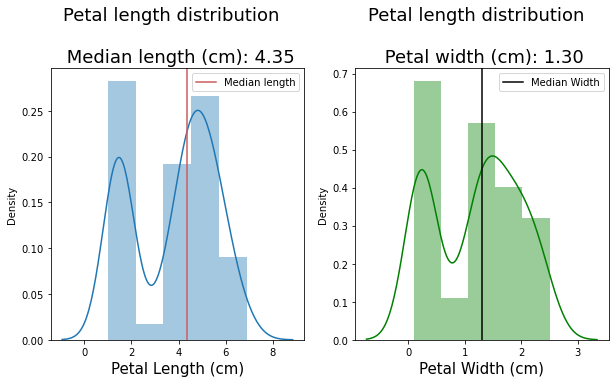

In [7]:
fig2=plt.figure(figsize=(10,5))
ax3=fig2.add_subplot(121)

g=sns.distplot(df_iris['PetalLengthCm'],ax=ax3)
ax3.set_xlabel('Petal Length (cm)',size=15)
ax3.set_title('Petal length distribution  \n \n Median length (cm): {0:.2f}'.format(df_iris['PetalLengthCm'].median()),size=18)
g.axvline(df_iris['PetalLengthCm'].median(),color='indianred',label='Median length')
ax3.legend()


ax4=fig2.add_subplot(122)
h=sns.distplot(df_iris['PetalWidthCm'],ax=ax4,color='green')
ax4.set_xlabel('Petal Width (cm)',size=15)
ax4.set_title('Petal length distribution  \n \n Petal width (cm): {0:.2f}'.format(df_iris['PetalWidthCm'].median()),size=18)
h.axvline(df_iris['PetalWidthCm'].median(),color='black',label='Median Width')
ax4.legend()

As we can see, the petal lengths and width are highly dispersed. Infact, it seems like the distribution is **bimodal** in nature i.e. with two peaks.


Now that we have seen the complete distribution of the dimensions of petal and sepal dimensions, let us try to visualise the dimensions in a more granular nature with respect to each of the species.


### Sepal and petal distributions of each flower species

Text(0.5, 1.0, 'Sepal Width distribution of each species')

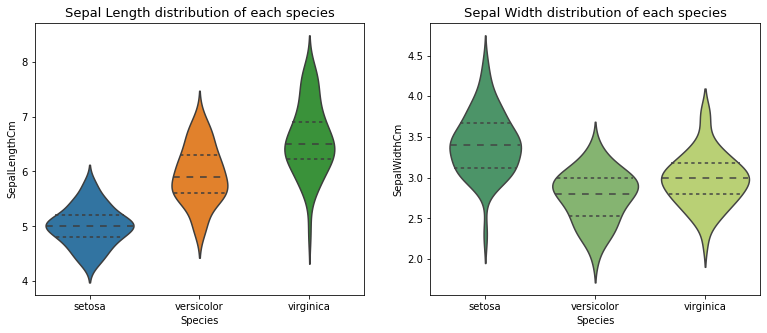

In [8]:
df_vir=df_iris[df_iris['Species']=='virginica']
df_set=df_iris[df_iris['Species']=='setosa']
df_ver=df_iris[df_iris['Species']=='versicolor']


fig3=plt.figure(figsize=(13,5))

ax5=fig3.add_subplot(121)

a=sns.violinplot(x='Species',y='SepalLengthCm',data=df_iris,ax=ax5,orient='v',inner='quartile')

ax5.set_title('Sepal Length distribution of each species',size=13)


ax6=fig3.add_subplot(122)
b=sns.violinplot(x='Species',y='SepalWidthCm',data=df_iris,ax=ax6,orient='v',inner='quartile',palette='summer')
ax6.set_title('Sepal Width distribution of each species',size=13)


Here, we see the various violinplots of each of the species of flowers. As we can see, the sepal lengths are lowest for Setosa and highest for Vriginica. The inner lines show the quartile. The mid line in each violinplot shows the median values.

On the other hand, when we compare the sepal widths, the median sepal width is highest for Setosa.

Let us perform the similar assessment for the petal width and length.



Text(0.5, 1.0, 'Petal Width distribution of each species')

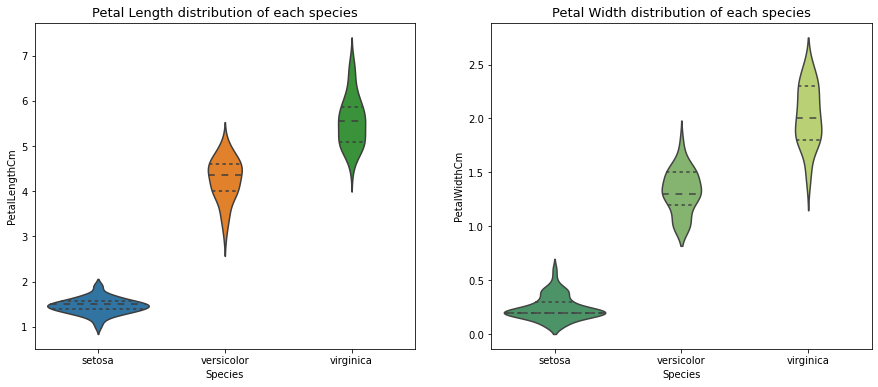

In [9]:
fig4=plt.figure(figsize=(15,6))
ax6=fig4.add_subplot(121)

a=sns.violinplot(x='Species',y='PetalLengthCm',data=df_iris,ax=ax6,orient='v',inner='quartile')

ax6.set_title('Petal Length distribution of each species',size=13)


ax7=fig4.add_subplot(122)
b=sns.violinplot(x='Species',y='PetalWidthCm',data=df_iris,ax=ax7,orient='v',inner='quartile',palette='summer')
ax7.set_title('Petal Width distribution of each species',size=13)



As it was already established, the petal dimensions for each of the species vary by a large amount when compared to sepal dimensions. Hence, we can see the violinplots are much further apart.


Let us check the scatterplots of the dimensions of sepals and petals of each of the species.

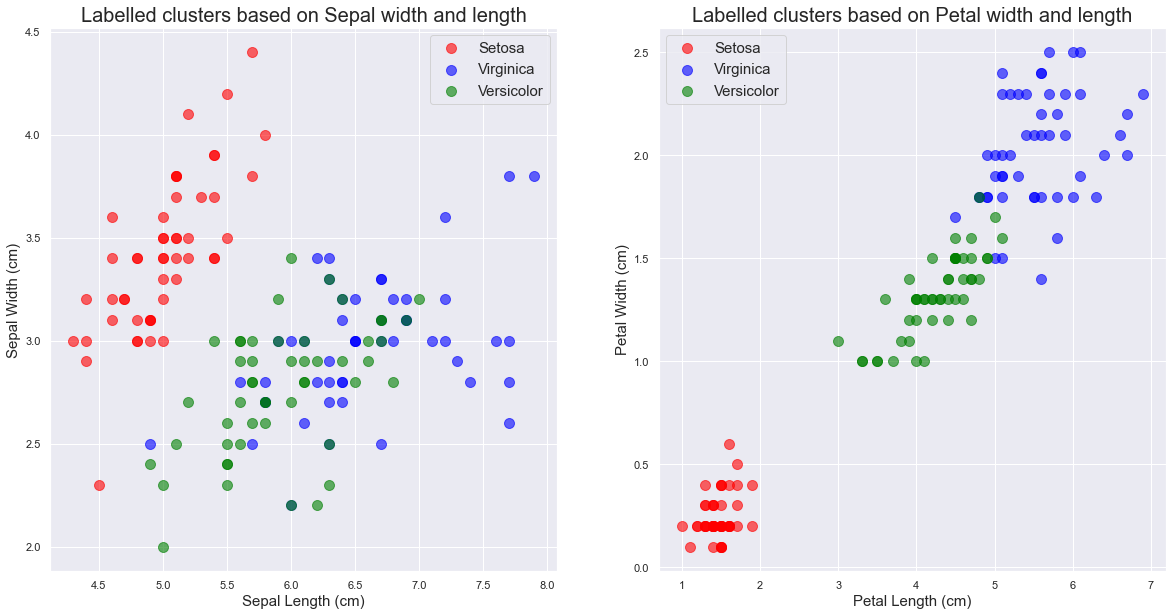

In [10]:
sns.set()
fig5=plt.figure(figsize=(20,10))
ax8=fig5.add_subplot(121)
ax8.set_title('Labelled clusters based on Sepal width and length',size=20)

ax8.scatter(df_set.iloc[:,0],df_set.iloc[:,1],c='red',s=100,alpha=0.6,label='Setosa')
ax8.scatter(df_vir.iloc[:,0],df_vir.iloc[:,1],c='blue',s=100,alpha=0.6,label='Virginica')
ax8.scatter(df_ver.iloc[:,0],df_ver.iloc[:,1],c='green',s=100,alpha=0.6,label='Versicolor')

ax8.set_xlabel('Sepal Length (cm)',size=15)
ax8.set_ylabel('Sepal Width (cm)',size=15)

ax8.legend(fontsize=15)


ax8=fig5.add_subplot(122)
ax8.set_title('Labelled clusters based on Petal width and length',size=20)

ax8.scatter(df_set.iloc[:,2],df_set.iloc[:,3],c='red',s=100,alpha=0.6,label='Setosa')
ax8.scatter(df_vir.iloc[:,2],df_vir.iloc[:,3],c='blue',s=100,alpha=0.6,label='Virginica')
ax8.scatter(df_ver.iloc[:,2],df_ver.iloc[:,3],c='green',s=100,alpha=0.6,label='Versicolor')

ax8.set_xlabel('Petal Length (cm)',size=15)
ax8.set_ylabel('Petal Width (cm)',size=15)

ax8.legend(fontsize=15)

As was established through the violinplots, the petal dimensions are extremely scattered while sepal dimensions are very close to each other.


### Step 4: Machine Learning

Let us now apply machine learning concept to be able to predict the species of flower when we are given with any dimensions of sepal and petal.

This would require us to perform classification. Let us apply a tree based algorithm such as Decision Tree classifier which could help us perform the required classification.

First off, let us encode the targets as 

1: Setosa

2: Virginica

3: Versicolor


In [11]:
df_iris['Species']=df_iris['Species'].replace('setosa',1)
df_iris['Species']=df_iris['Species'].replace('virginica',2)
df_iris['Species']=df_iris['Species'].replace('versicolor',3)

Now that we have encoded the targets, let us segregate it from the input dataframe.

In [12]:
targets=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [13]:
X=df_iris
y=targets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,shuffle=True)

In [16]:
dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [17]:
y_preds=dtc.predict(X_test)
dtc.score(X_test,y_test)

0.9736842105263158

The decision tree classifier could get a very high accuracy with 97.36 %. Let us make a heatmap confusion matrix that will help us understand how many values were correctly predicted.

Text(66.5, 0.5, 'Actual')

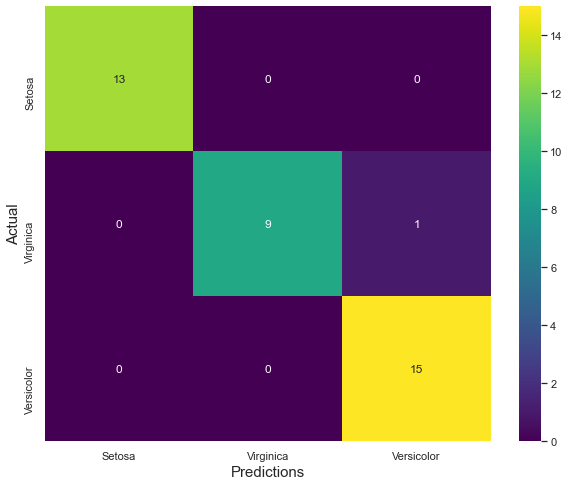

In [18]:
conf_mat=confusion_matrix(y_preds,y_test)
fig6=plt.figure(figsize=(10,8))
ax9=fig6.add_subplot(111)

sns.heatmap(conf_mat,annot=True,cmap='viridis',ax=ax9)
ax9.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
ax9.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
plt.xlabel('Predictions',size=15)
plt.ylabel('Actual',size=15)

As we can see from the above heatmap, only one particular instance was incorrectly classifide by the decision tree. This is an incredibly good classification.

Let us now try to check which are the most important features that helped us to such an accurate classification.

In [19]:
dtc.fit(X_train,y_train)
cols=df_iris.columns
col_arr=np.array(cols).reshape(-1,1)
df_imp=pd.DataFrame(col_arr)
df_imp.rename(columns={0:'Feature'},inplace=True)
imp=(100*dtc.feature_importances_)
df_imp['Importance']=imp
df_imp

,Feature,Importance
0,SepalLengthCm,0.000000
1,SepalWidthCm,2.014872
2,PetalLengthCm,89.994526
3,PetalWidthCm,7.990602


C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Feature importance')

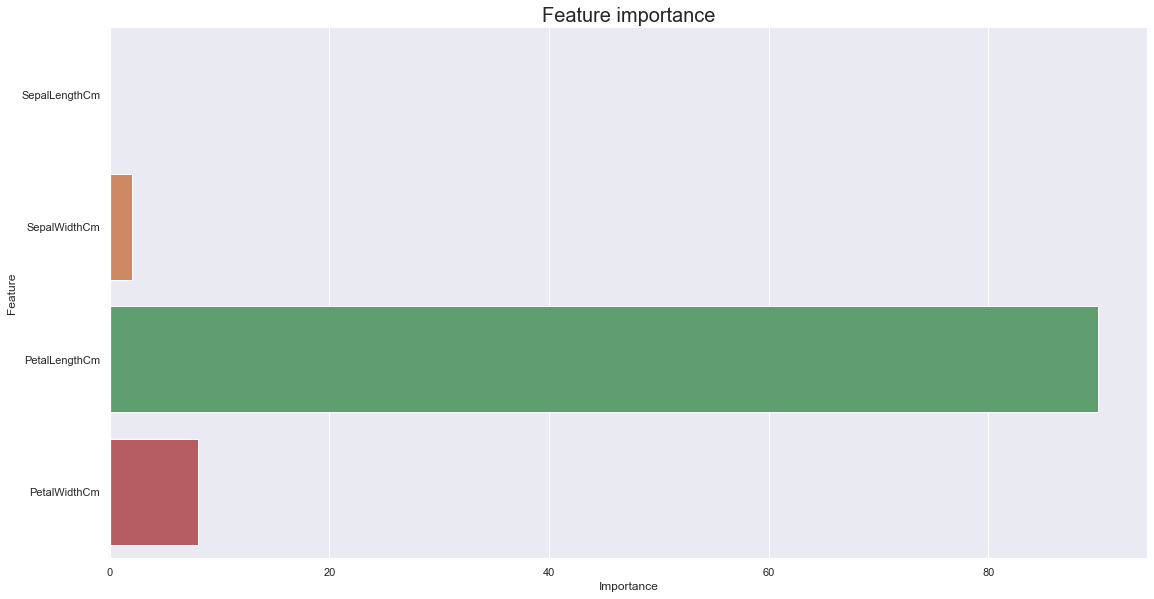

In [20]:
sns.catplot('Importance','Feature',data=df_imp,kind='bar',height=8,aspect=2)
plt.title('Feature importance',size=20)

From the above plot, we can see that petal length has the highest importance when it comes to classifying the flowers into their species.

Let us finally take a look at our decision tree which was able to classify the various species correctly using thhe feature values such as sepal and petal length,width. The visual representation of the tree tells us the decision making that went through the alogrithm

C:\Users\kesha\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\tree\_export.py:185: FutureWarning: 'rotate' has no effect and is deprecated in 0.23. It will be removed in 0.25.
  FutureWarning)


[Text(372.0, 815.4, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 41, 34]\nclass = versicolor'),
 Text(279.0, 634.2, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(465.0, 634.2, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 41, 34]\nclass = versicolor'),
 Text(186.0, 453.0, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]\nclass = virginica'),
 Text(93.0, 271.80000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]\nclass = virginica'),
 Text(279.0, 271.80000000000007, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = versicolor'),
 Text(186.0, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = versicolor'),
 Text(372.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(744.0, 453.0, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = versicolor'),
 Text(651.0, 271.80

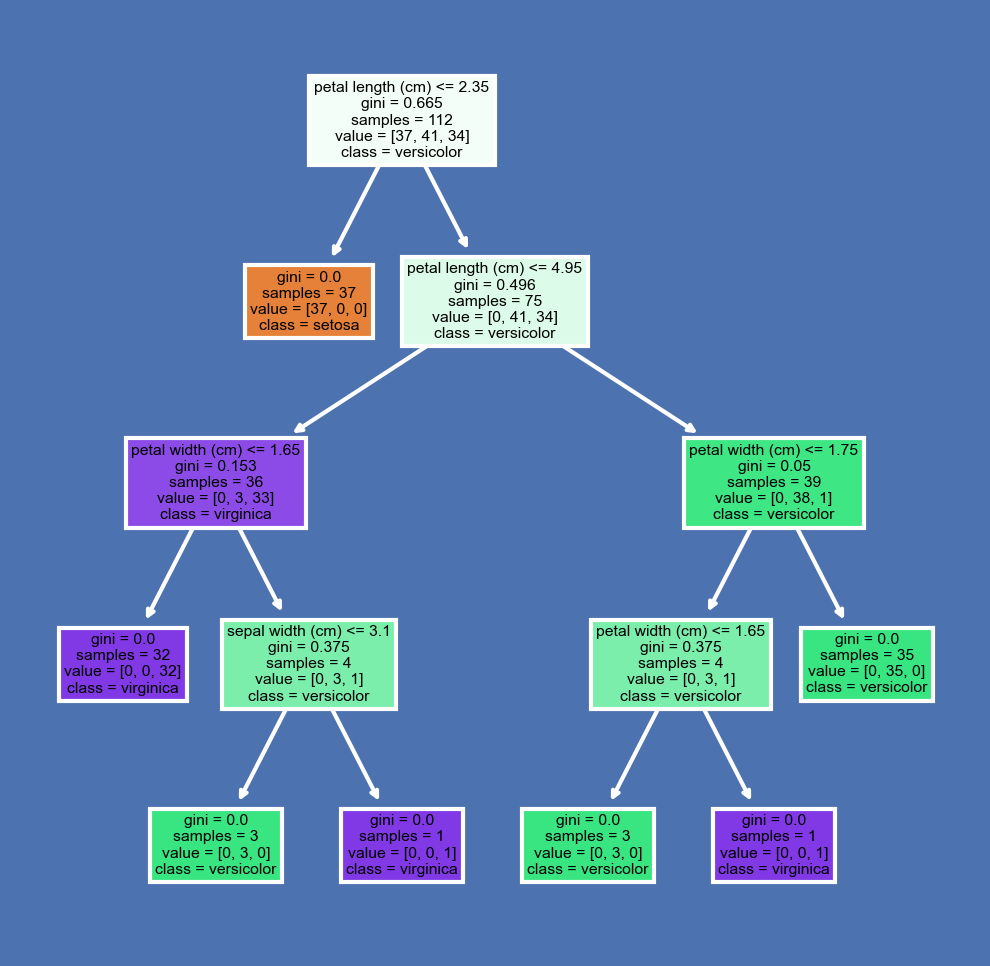

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300 ,facecolor='b')
mpl.rcParams['text.color'] = 'black'
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']


from sklearn import tree
tree.plot_tree(dtc,feature_names = fn, 
               class_names=cn,filled=True,rotate=True,ax=axes)